<a href="https://colab.research.google.com/github/ChallaHarika23/linalg/blob/main/probability%26statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import plotly.graph_objects as pg
import plotly.express as px

In [14]:
def toss_coin(number_of_tosses=50):
    return pd.Series(np.random.choice(['Heads', 'Tails'], number_of_tosses))

def throw_dice(number_of_tosses=250):
    return pd.Series(np.random.randint(1,6+1, number_of_tosses))

res_coin=toss_coin()
res_dice=throw_dice()
print(res_coin.value_counts())
print(res_dice.value_counts())

Heads    28
Tails    22
dtype: int64
3    50
5    47
4    43
2    39
6    38
1    33
dtype: int64


In [15]:
fig_coin=pg.Figure([pg.Bar(x=res_coin.value_counts().keys(),
                        y=res_coin.value_counts().values)])
fig_coin.show()

In [16]:
fig_dice=pg.Figure([pg.Bar(x=res_dice.value_counts().keys(),
                        y=res_dice.value_counts().values)])
fig_dice.show()

In [17]:
#Derived Probability Distributions

In [18]:
result= pd.Series([np.sum(toss_coin(35) == 'Heads') for _ in range(2500)])
fig = pg.Figure([pg.Bar(x=result.value_counts().keys(),
                        y=result.value_counts().values)])
fig.show()

In [19]:
result= pd.Series([np.sum(toss_coin(38) == 'Heads') for _ in range(4500)])
fig = pg.Figure([pg.Bar(x=result.value_counts().keys(),
                        y=result.value_counts().values)])
fig.show()

In [20]:
result= {shots: throw_dice(shots) for shots in [25, 300, 4500, 12000, 1800000,300000000]}
fig = pg.Figure([pg.Bar(x=result.value_counts().keys(),
                        y=result.value_counts().values / shots,)
                    for shots, result in result.items()])
fig.add_shape(type='line', x0=0.8, y0=2/6, x1=5.5, y1=2/6, line=dict(color='green',))
fig.show()

Try slove this

In [21]:
# 1)
deck_cards=52
numbered_cards=9  #2 to 10
total_numberedcards=4*numbered_cards
probability=total_numberedcards/deck_cards
print(probability)

0.6923076923076923


In [22]:
# 2)
prob_firstcard=probability
prob_secondcard=probability
res=prob_firstcard*prob_secondcard
print(res)

0.4792899408284023


In [23]:
# 3)
prob_second=(total_numberedcards-1)/(deck_cards-1)
result=prob_firstcard*prob_second
print(result)

0.4751131221719457


In [24]:
# 4)
print(probability)  # the order of deck does not effect the probability because the numbers are evenly arranged in deck of cards.

0.6923076923076923


In [86]:
#Simulating to Expectation
import random
deck = ['Ace'] * 4 + ['Non-Ace'] * 48

random.shuffle(deck)

non_ace_count = 0


while deck:
    card = deck.pop(0)
    if card == 'Non-Ace':
        non_ace_count += 1
    else:
        break
print(non_ace_count)

33


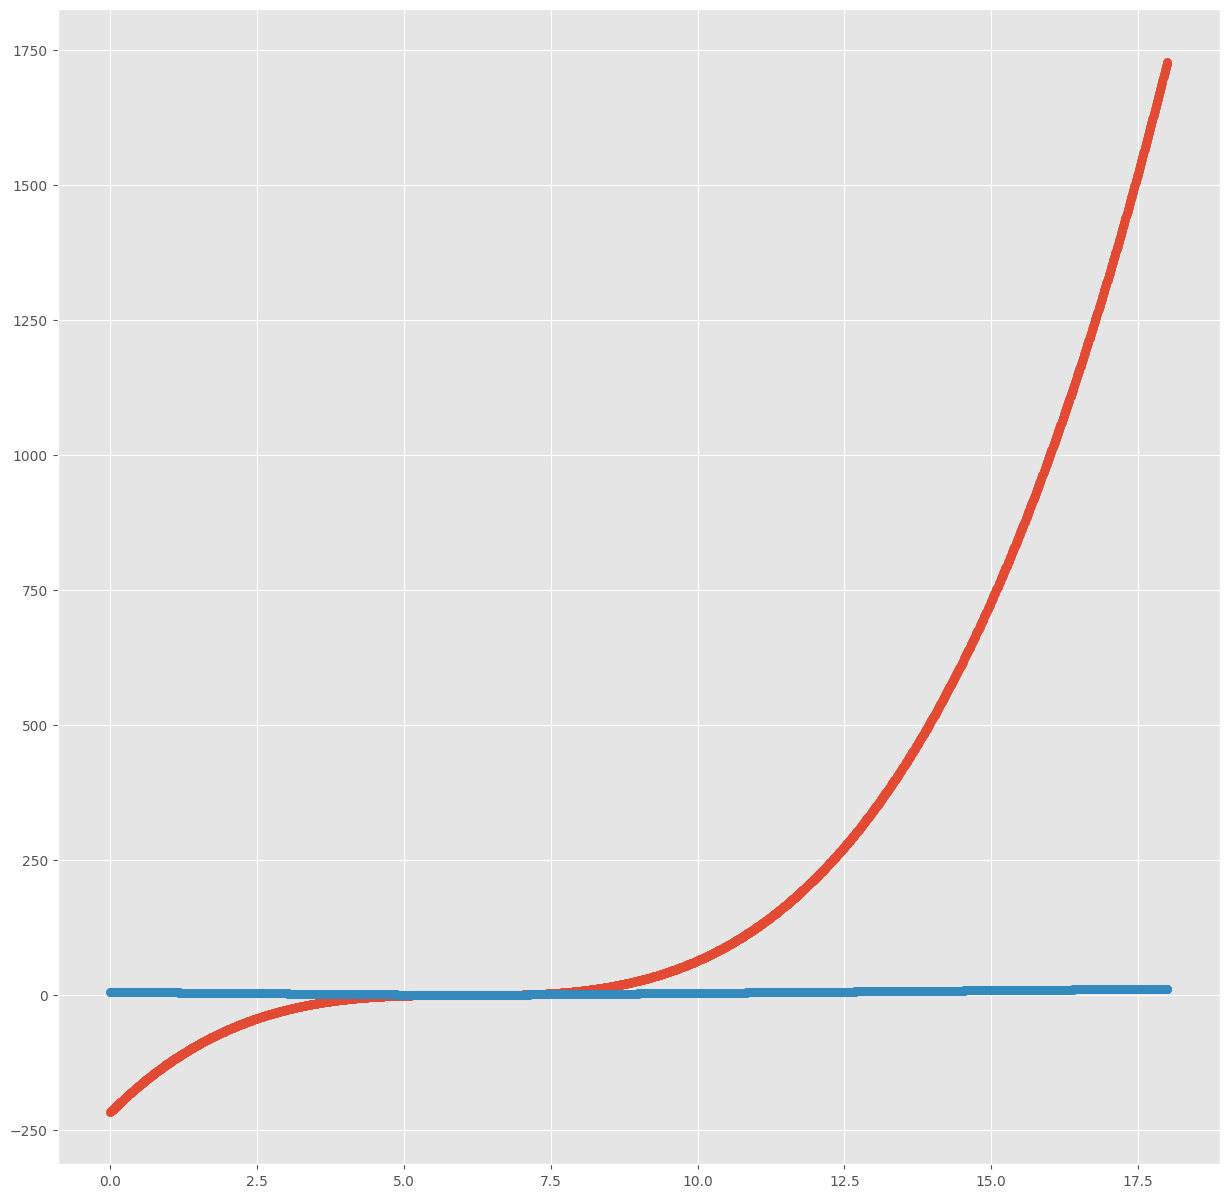

In [25]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(15, 15))

measurements = np.linspace(0, 18, 2000)
plt.scatter(measurements, (measurements - 6) ** 3, label='Squared Error')
plt.scatter(measurements, abs(measurements - 6), label='Absolute Error')
plt.show()

In [37]:
import pandas as pd
data = pd.read_csv("/content/data_science_student_marks.csv")
print(data.shape)


(497, 8)


In [45]:
data.agg(["mean", "var", "std"])

<ipython-input-45-00233bc84f52>:1: FutureWarning:

['location'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.



,student_id,sql_marks,excel_marks,python_marks,power_bi_marks,english_marks,python_std
mean,252.000000,84.661972,85.384306,85.388330,84.545272,84.824950,2.555523e-16
var,20625.500000,76.482281,77.132253,78.830751,79.264579,82.092279,1.000000e+00
std,143.615807,8.745415,8.782497,8.878668,8.903066,9.060479,1.000000e+00


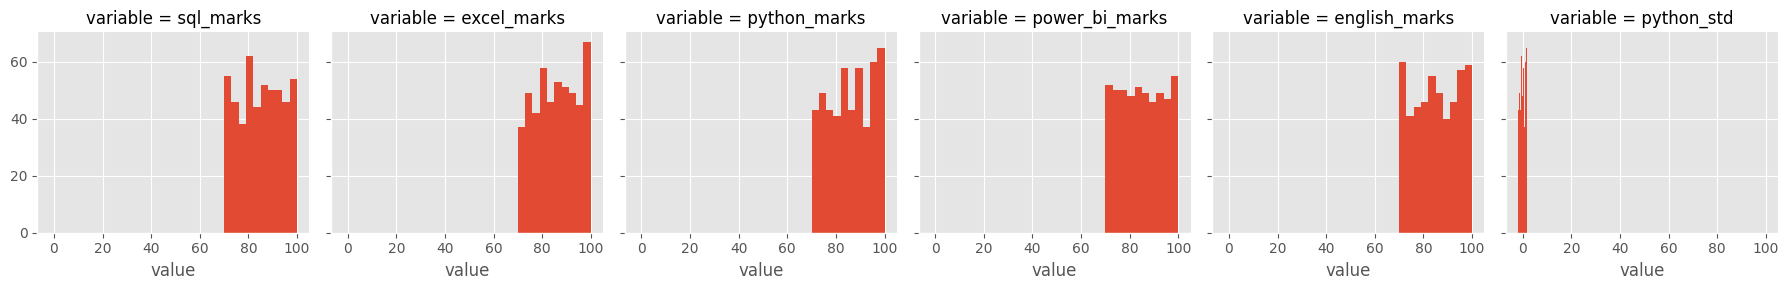

In [46]:
data.drop('location', inplace=True, axis=1)
res = sns.FacetGrid(data.melt("student_id"), col="variable")
res.map(plt.hist, "value")

In [55]:
data["python_std"] = (data["python_marks"] - data["python_marks"].mean()) / data["python_marks"].std()

In [56]:
data.head()

,student_id,sql_marks,excel_marks,python_marks,power_bi_marks,english_marks,python_std,sql_std,excel_std,eng_std
0,4,95,99,87,82,75,0.181522,1.182108,1.550322,-1.084374
1,5,99,95,89,86,82,0.406781,1.639491,1.094870,-0.311788
2,6,72,70,99,79,77,1.533076,-1.447841,-1.751701,-0.863635
3,7,97,90,74,72,85,-1.282662,1.410800,0.525556,0.019320
4,8,91,71,79,80,75,-0.719514,0.724726,-1.637838,-1.084374


In [58]:
data["sql_std"] = (data["sql_marks"] - data["sql_marks"].mean()) / data["sql_marks"].std()
data["excel_std"] = (data["excel_marks"] - data["excel_marks"].mean()) / data["excel_marks"].std()
data["eng_std"] = (data["english_marks"] - data["english_marks"].mean()) / data["english_marks"].std()
data.head()

,student_id,sql_marks,excel_marks,python_marks,power_bi_marks,english_marks,python_std,sql_std,excel_std,eng_std
0,4,95,99,87,82,75,0.181522,1.182108,1.550322,-1.084374
1,5,99,95,89,86,82,0.406781,1.639491,1.094870,-0.311788
2,6,72,70,99,79,77,1.533076,-1.447841,-1.751701,-0.863635
3,7,97,90,74,72,85,-1.282662,1.410800,0.525556,0.019320
4,8,91,71,79,80,75,-0.719514,0.724726,-1.637838,-1.084374


As we can observe that stu_id 4 and 5 are performing better comapred to other students.

**Mathematics of Probability**

You want to go for a picnic today but it is cloudy in the morning. From experience, you know that:

the probability of raining on any given day is 10%,
the probability that it is cloudy on any given day is 40%, and
50% of all rainy days start off cloudy.
What is the probability of raining given that it is cloudy?

In [59]:
prob_cloudy=0.5*0.1/0.4
print(prob_cloudy)

0.125


**Binomial Distribution**

In [60]:
from scipy.stats import binom

In [ ]:
#If the chance of winning a game is 0.60, what is the probability of losing all 4 games?

In [62]:
binom.pmf(n=4,k=4,p=0.60)

0.1296

In [ ]:
#If we win 3 in 4 games, it's unlikely we lose 4 in 4 games.

In [65]:
print(1-binom.pmf(n=4,k=4,p=0.60))

#to find cdf if x=2
binom.cdf(2,n=4,p=0.60)

0.8704000000000001


0.5247999999999999

In [67]:
from scipy.stats import norm

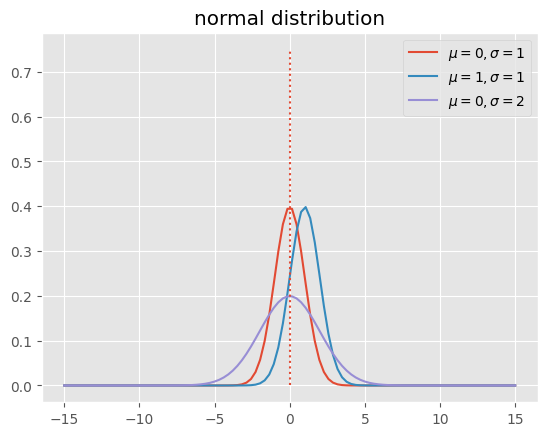

In [70]:
x = np.linspace(-15, 15, 100)
f1 = norm.pdf(x, loc=0, scale=1)
f2 = norm.pdf(x, loc=1, scale=1)
f3 = norm.pdf(x, loc=0, scale=2)

plt.plot(x, f1, label="$\mu=0, \sigma=1$")
plt.plot(x, f2, label="$\mu=1, \sigma=1$")
plt.plot(x, f3, label="$\mu=0, \sigma=2$")
plt.vlines(x=0, ymin=0, ymax=0.75, linestyles="dotted")

plt.legend()
plt.title("normal distribution")
plt.show()

In [72]:
print(norm.cdf(0))
norm.ppf(0)

0.5


-inf

In [73]:
#76% of Malaysians have height of less than ... cm.,mean=180,S.d=6.5
norm.pdf(0.76,loc=180,scale=6.5)

4.664830394901309e-167

**poisson Distribution**

In [74]:
from scipy.stats import poisson

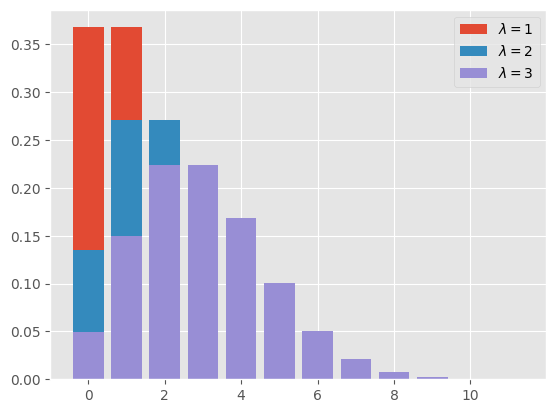

In [75]:
x = np.arange(12)
f1 = poisson.pmf(x, mu=1)
f2 = poisson.pmf(x, mu=2)
f3 = poisson.pmf(x, mu=3)

plt.bar(x, f1, label="$\lambda=1$")
plt.bar(x, f2, label="$\lambda=2$")
plt.bar(x, f3, label="$\lambda=3$")
plt.legend()

In [76]:
poisson.pmf(6,9)

0.09109031901892926

***Central limit Theorem***

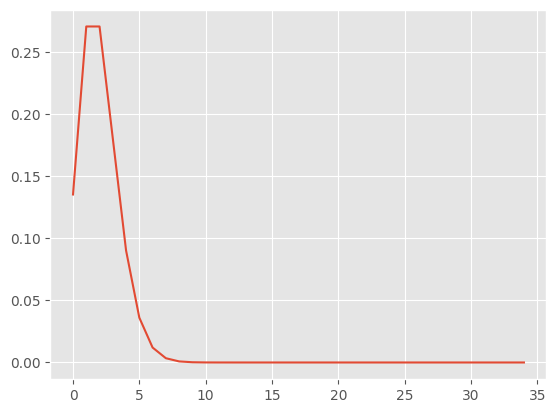

In [77]:
bins = np.arange(0, 35)
p_po = poisson.pmf(bins, mu=2)
plt.plot(bins, p_po)

(array([ 3., 16., 34., 64., 73., 57., 31., 15.,  5.,  2.]),
 array([1.37142857, 1.51428571, 1.65714286, 1.8       , 1.94285714,
        2.08571429, 2.22857143, 2.37142857, 2.51428571, 2.65714286,
        2.8       ]),
 <BarContainer object of 10 artists>)

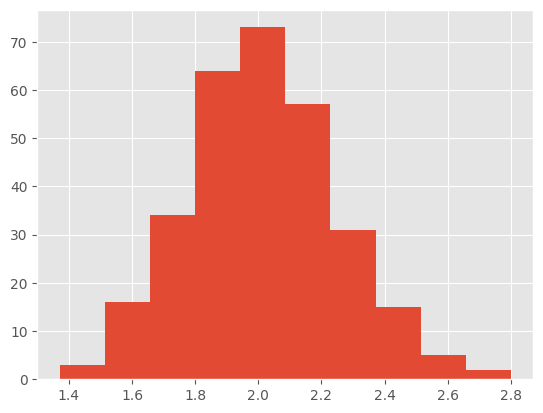

In [78]:
def sample_p(_):
    samples = poisson.rvs(mu=2, size=35)
    return np.mean(samples)

mean_samples = list(map(sample_p, np.arange(300)))
plt.hist(mean_samples)

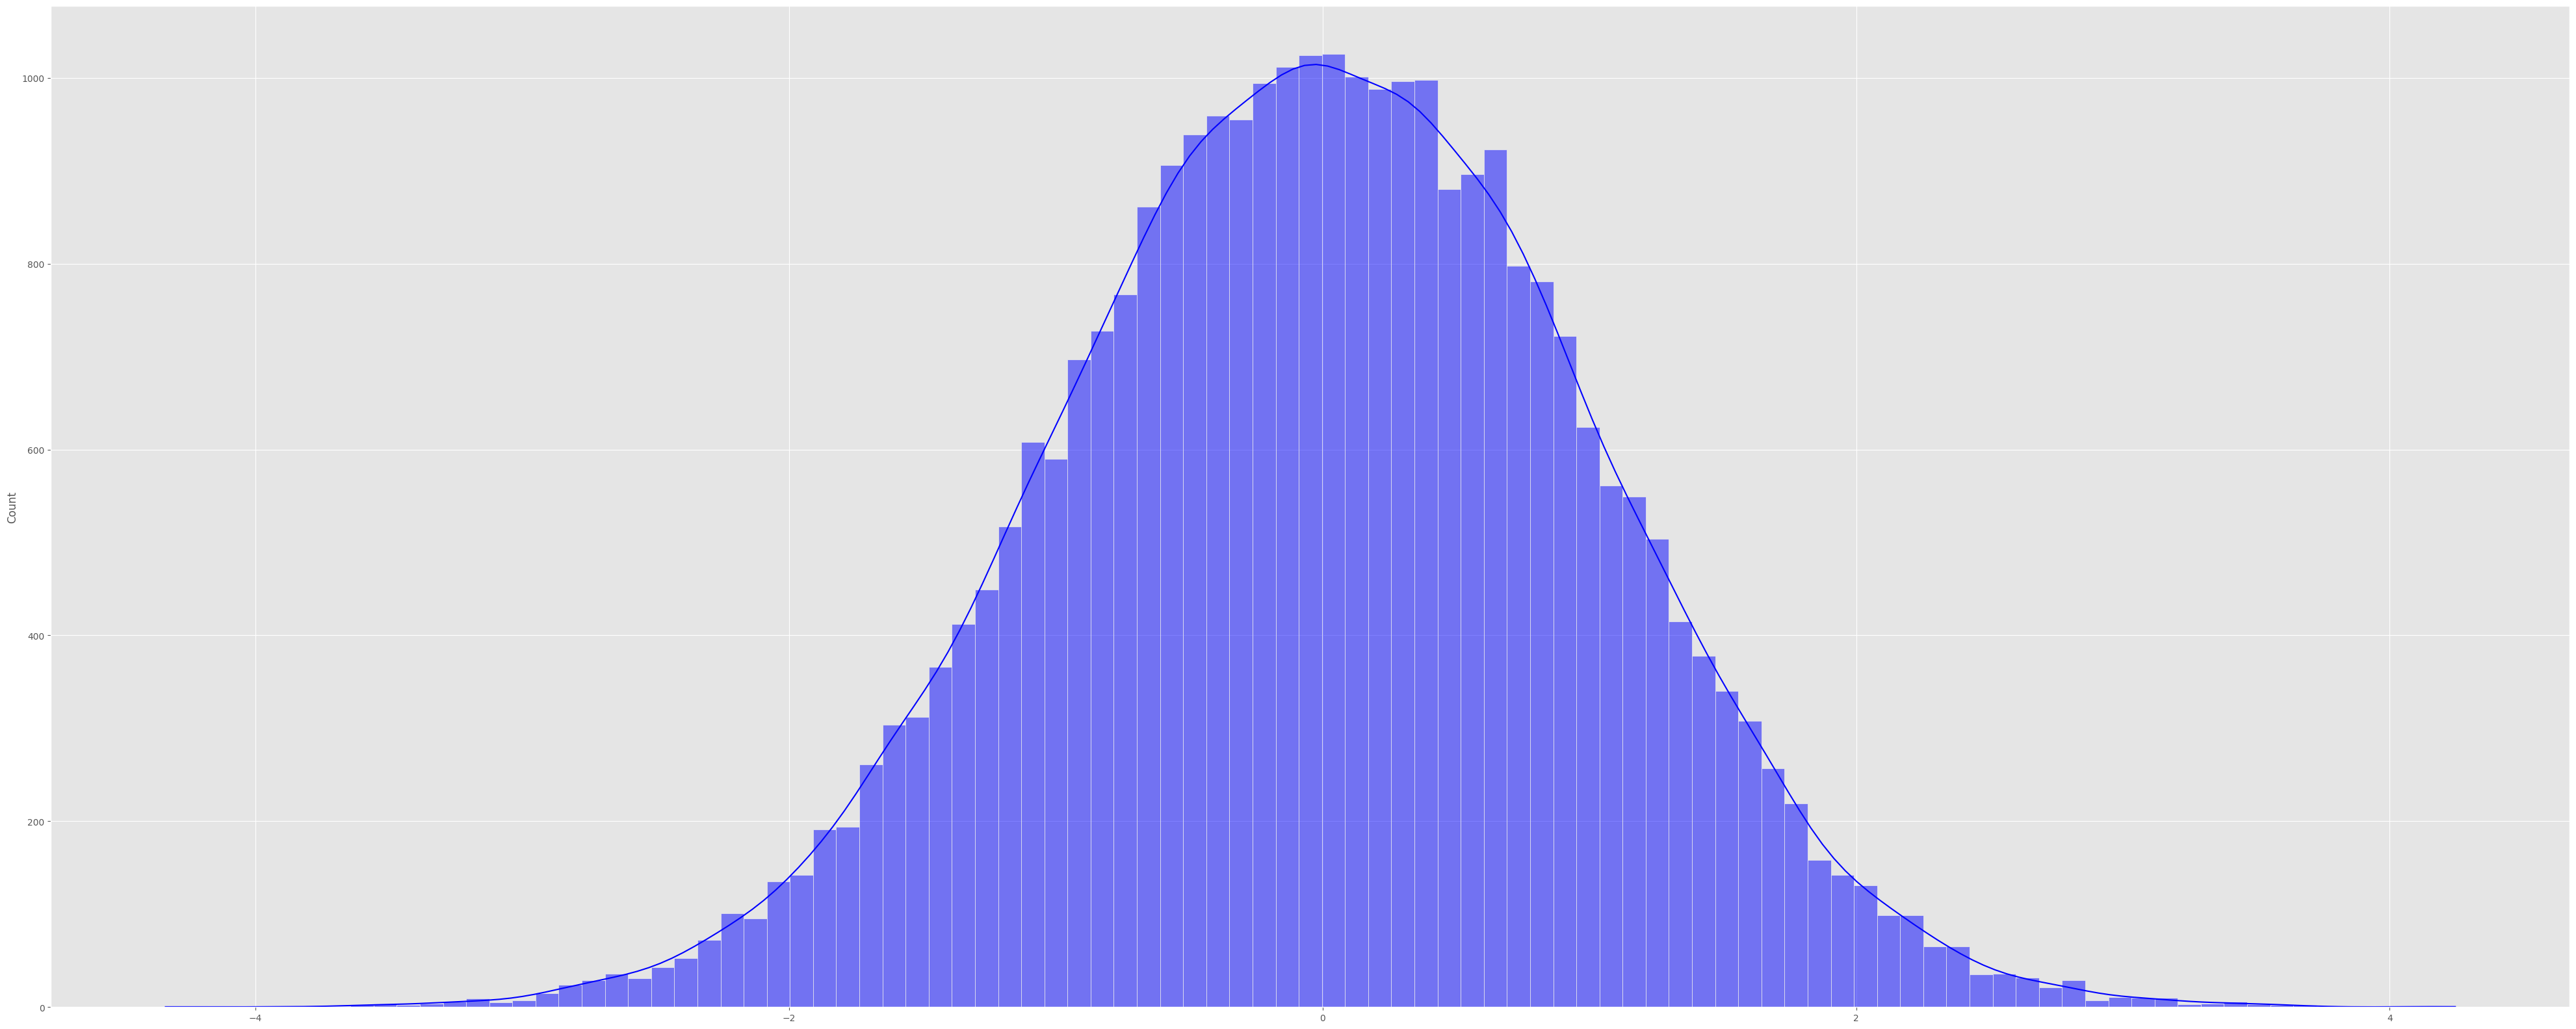

In [80]:
import seaborn as sns
plt.figure(figsize=(50, 20))
x = np.random.normal(size=(30000))
sns.histplot(x, kde=True,color='blue')
plt.show()

Entropy

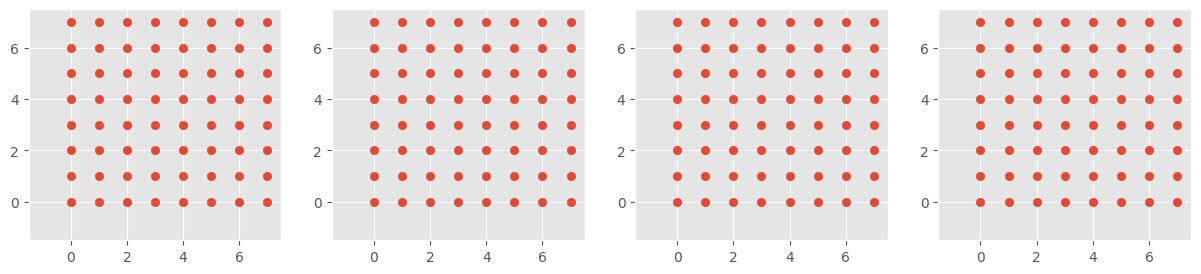

In [81]:
fix, axis = plt.subplots(1,4, figsize=(15, 3))

for ax in axis:
    x, y = np.meshgrid(np.arange(25), np.arange(25))
    ax.scatter(x.ravel(), y.ravel())
    ax.set_xlim(-1.5, 7.5)
    ax.set_ylim(-1.5, 7.5)

plt.show()

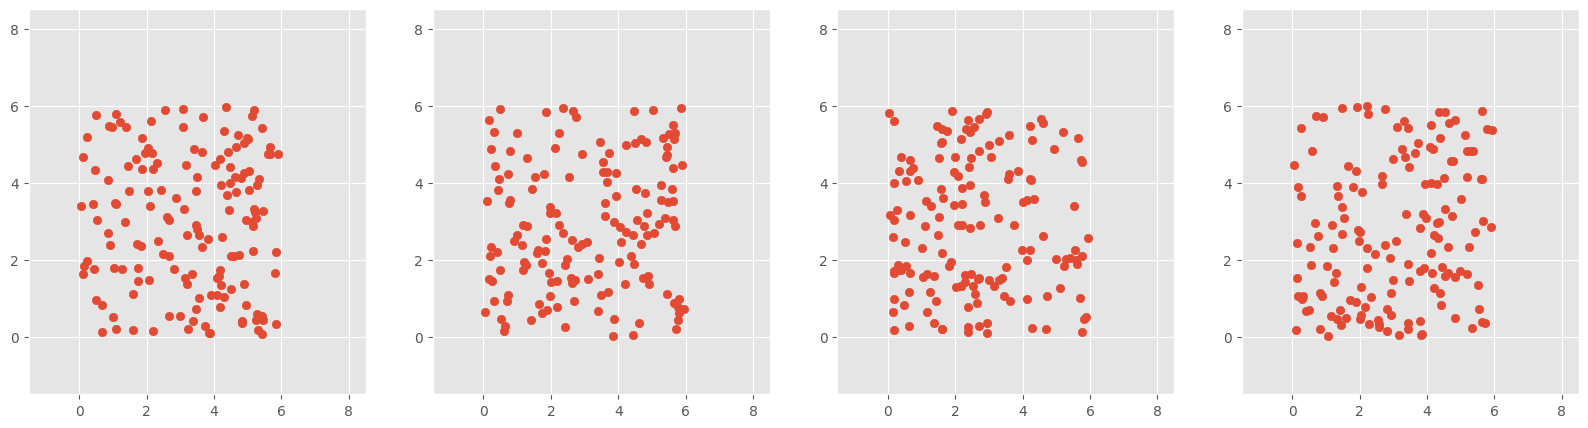

In [84]:
fix, axs = plt.subplots(1, 4, figsize=(20, 5))

for ax in axs:
    x, y = np.random.random(150)*6, np.random.random(150)*6
    ax.scatter(x.ravel(), y.ravel())
    ax.set_xlim(-1.5, 8.5)
    ax.set_ylim(-1.5, 8.5)

plt.show()